In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the Dataset

In [7]:
#Clus-1
x1 = np.random.normal(25,5, 1000)
# mean = 25, sigma = 5 , count = 1000
y1 = np.random.normal(25, 5, 1000)

#Clus-2
x2 = np.random.normal(55,5, 1000)
# mean = 25, sigma = 5 , count = 1000
y2 = np.random.normal(60, 5, 1000)

#Clus-3
x3 = np.random.normal(55,5, 1000)
# mean = 25, sigma = 5 , count = 1000
y3 = np.random.normal(15, 5, 1000)



In [8]:
x = np.concatenate((x1,x2,x3), axis=0)
y = np.concatenate((y1, y2, y3), axis=0)

In [9]:
datas = {"x": x, "y":y}
dt = pd.DataFrame(datas)
dt.head()

,x,y
0,37.340131,17.452195
1,27.334203,15.615615
2,17.522067,18.742147
3,30.508980,25.780751
4,28.882174,26.221277


In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


# Visualize the Data

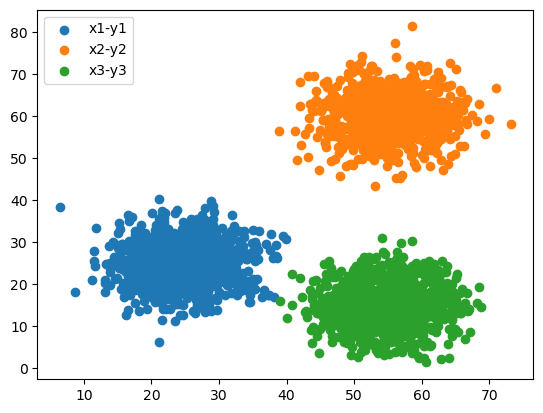

In [12]:
plt.scatter(x1, y1, label="x1-y1")
plt.scatter(x2, y2, label="x2-y2")
plt.scatter(x3, y3, label="x3-y3")
plt.legend()
plt.show()

# Kmeans

T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

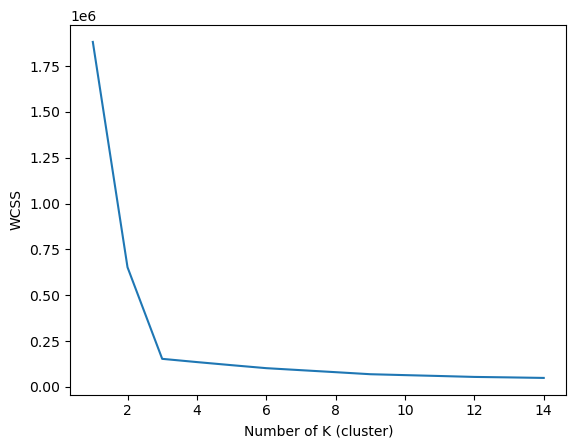

In [18]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dt)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1,15), wcss)
plt.xlabel("Number of K (cluster)")
plt.ylabel("WCSS")
plt.show()
    

- elbow is in 3. We must use 3 clusters.

In [23]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(dt)

dt["clusters"] = clusters

dt.head()


T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,x,y,clusters
0,37.340131,17.452195,0
1,27.334203,15.615615,0
2,17.522067,18.742147,0
3,30.508980,25.780751,0
4,28.882174,26.221277,0


# Visualize the Data

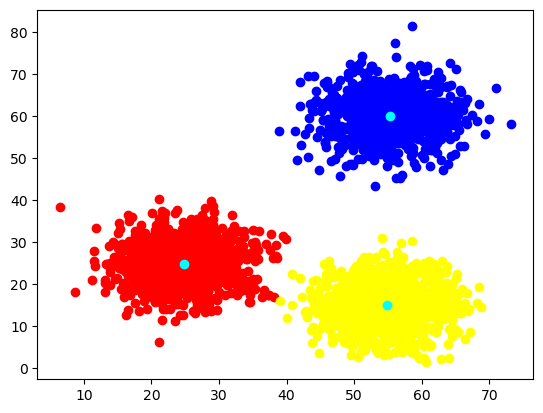

In [27]:
plt.scatter(dt.x[dt.clusters == 0], dt.y[dt.clusters == 0], color="red", label="0")
plt.scatter(dt.x[dt.clusters == 1], dt.y[dt.clusters == 1], color="blue", label="1")
plt.scatter(dt.x[dt.clusters == 2], dt.y[dt.clusters == 2], color="yellow", label="2")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color="cyan")